In [3]:
%cd drive/MyDrive/DataMining/hw2

/content/drive/MyDrive/DataMining/hw2


# <div dir="rtl"> سوال اول</div>


In [41]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
import graphviz
import pydotplus
from IPython.display import Image
from sklearn.ensemble import RandomForestClassifier


In [5]:
df = pd.read_csv('titanic.csv')

In [6]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


## <div dir="rtl"> قسمت اول</div>

<div dir="rtl">

مشخص کردن تعداد داده های missing

<div>

In [8]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

## <div dir="rtl"> قسمت دوم</div>

<div dir="rtl">

حذف مقادیر نامشخص با روشهای گفته شده

<div>

In [9]:
df['Age'].fillna((df['Age'].median()), inplace=True)
df['Embarked'].fillna((df['Embarked'].mode()[0]), inplace=True)
df = df.dropna()

In [10]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

## <div dir="rtl"> قسمت سوم</div>

<div dir="rtl">

اضافه کردن ستون familySize

<div>

In [11]:
df.insert(df.shape[1],'FamilySize',df['Parch']+df['SibSp']+1)

In [12]:
df.reset_index(inplace=True)

## <div dir="rtl"> قسمت چهارم</div>

<div dir="rtl">

تغییر ستون سن

<div>

In [13]:
for i in range(df.shape[0]):
  try:
    if df['Age'][i] < 10:
      df['Age'][i] = 'child'
    else:
      df['Age'][i] = df['Sex'][i]
  except:
    j = 0

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [14]:
df['Age']

0      female
1      female
2        male
3       child
4      female
        ...  
199    female
200      male
201    female
202    female
203      male
Name: Age, Length: 204, dtype: object

## <div dir="rtl"> قسمت پنجم</div>

<div dir="rtl">

حذف ستونهای خواسته شده

<div>

In [15]:
df.drop(columns=['Parch', 'SibSp', 'Ticket', 'Name', 'PassengerId'], inplace=True)

In [16]:
df

,index,Survived,Pclass,Sex,Age,Fare,Cabin,Embarked,FamilySize
0,1,1,1,female,female,71.2833,C85,C,2
1,3,1,1,female,female,53.1000,C123,S,2
2,6,0,1,male,male,51.8625,E46,S,1
3,10,1,3,female,child,16.7000,G6,S,3
4,11,1,1,female,female,26.5500,C103,S,1
...,...,...,...,...,...,...,...,...,...
199,871,1,1,female,female,52.5542,D35,S,3
200,872,0,1,male,male,5.0000,B51 B53 B55,S,1
201,879,1,1,female,female,83.1583,C50,C,2
202,887,1,1,female,female,30.0000,B42,S,1


## <div dir="rtl"> قسمت f</div>

<div dir="rtl">

پیاده سازی mutual information function

<div>

In [17]:
import numpy as np
def computeMI(x, y):
    sum_mi = 0.0
    x_value_list = np.unique(x)
    y_value_list = np.unique(y)
    Px = np.array([ len(x[x==xval])/float(len(x)) for xval in x_value_list ]) 
    Py = np.array([ len(y[y==yval])/float(len(y)) for yval in y_value_list ]) 
    for i in range(len(x_value_list)):
        if Px[i] ==0.:
            continue
        sy = y[x == x_value_list[i]]
        if len(sy)== 0:
            continue
        pxy = np.array([len(sy[sy==yval])/float(len(y))  for yval in y_value_list]) 
        t = pxy[Py>0.]/Py[Py>0.] /Px[i] 
        sum_mi += sum(pxy[t>0]*np.log2( t[t>0]) ) 
    return sum_mi

## <div dir="rtl"> قسمت g</div>

<div dir="rtl">

با بررسی ارتباط همه ویژگیها با خصوصیت هدف به نتیجه میرسیم که بیشترین ارتباط با خصوصیت survived را خصوصیت کابین دارد و کمترین ارتباط را Pclass دارد

<div>

In [18]:
computeMI(df['Pclass'], df['Survived'])

0.01098824121841262

In [19]:
computeMI(df['Sex'], df['Survived'])

0.2441984546630964

In [20]:
computeMI(df['Age'], df['Survived'])

0.28981898599454603

In [21]:
computeMI(df['Fare'], df['Survived'])

0.5477869667727546

In [22]:
computeMI(df['Cabin'], df['Survived'])

0.7307239590226748

In [23]:
computeMI(df['Embarked'], df['Survived'])

0.013801616730082492

In [24]:
computeMI(df['FamilySize'], df['Survived'])

0.02678178487853807

## <div dir="rtl"> قسمت h</div>

<div dir="rtl">

تبدیل خصوصیات categorical به one hot encode


<div>

In [25]:
enc = OneHotEncoder(handle_unknown='ignore')
enc_df = pd.DataFrame(enc.fit_transform(df[['Sex']]).toarray(), columns=["Sex_0", "Sex_1"])
df = df.join(enc_df)

In [26]:
enc = OneHotEncoder(handle_unknown='ignore')
enc_df = pd.DataFrame(enc.fit_transform(df[['Age']]).toarray(), columns=["Age_0", "Age_1", "Age_2"])
df = df.join(enc_df)

In [27]:
enc = OneHotEncoder(handle_unknown='ignore')
enc_df = pd.DataFrame(enc.fit_transform(df[['Cabin']]).toarray())
df = df.join(enc_df)

In [28]:
enc = OneHotEncoder(handle_unknown='ignore')
enc_df = pd.DataFrame(enc.fit_transform(df[['Embarked']]).toarray(), columns=["Embarked_0", "Embarked_1", "Embarked_2"])
df = df.join(enc_df)

In [29]:
df

,index,Survived,Pclass,Sex,Age,Fare,Cabin,Embarked,FamilySize,Sex_0,...,140,141,142,143,144,145,146,Embarked_0,Embarked_1,Embarked_2
0,1,1,1,female,female,71.2833,C85,C,2,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,3,1,1,female,female,53.1000,C123,S,2,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,6,0,1,male,male,51.8625,E46,S,1,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,10,1,3,female,child,16.7000,G6,S,3,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
4,11,1,1,female,female,26.5500,C103,S,1,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199,871,1,1,female,female,52.5542,D35,S,3,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
200,872,0,1,male,male,5.0000,B51 B53 B55,S,1,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
201,879,1,1,female,female,83.1583,C50,C,2,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
202,887,1,1,female,female,30.0000,B42,S,1,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


## <div dir="rtl"> قسمت i</div>

<div dir="rtl">

ساختن x و y

<div>

In [30]:
x = df[df.columns[2:]]
x = x.drop(columns=["Age", "Sex", "Cabin", "Embarked"])
y = df["Survived"]

## <div dir="rtl"> قسمت j</div>

<div dir="rtl">

ساختن داده های آموزش و تست به نسبت 3 و 7

<div>

In [31]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

## <div dir="rtl"> قسمت k</div>

<div dir="rtl">

همانطور که در سلول زیر نمایش داده شده است دقت بدست آمده برای داده های آموزشی برابر با 100 درصد و دقت داده های تست برابر با 80 درصد است.

<div>

In [50]:
dtc = DecisionTreeClassifier(random_state=0)
dtc.fit(X_train, y_train)
y_train_pred = dtc.predict(X_train)
y_test_pred = dtc.predict(X_test)
dt_train_acc = metrics.accuracy_score(y_train, y_train_pred)
dt_test_acc = metrics.accuracy_score(y_test, y_test_pred)
dt_train_acc, dt_test_acc

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


(1.0, 0.8064516129032258)

## <div dir="rtl"> قسمت l</div>

<div dir="rtl">

ساخت درخت با دو روش خواسته شده

<div>

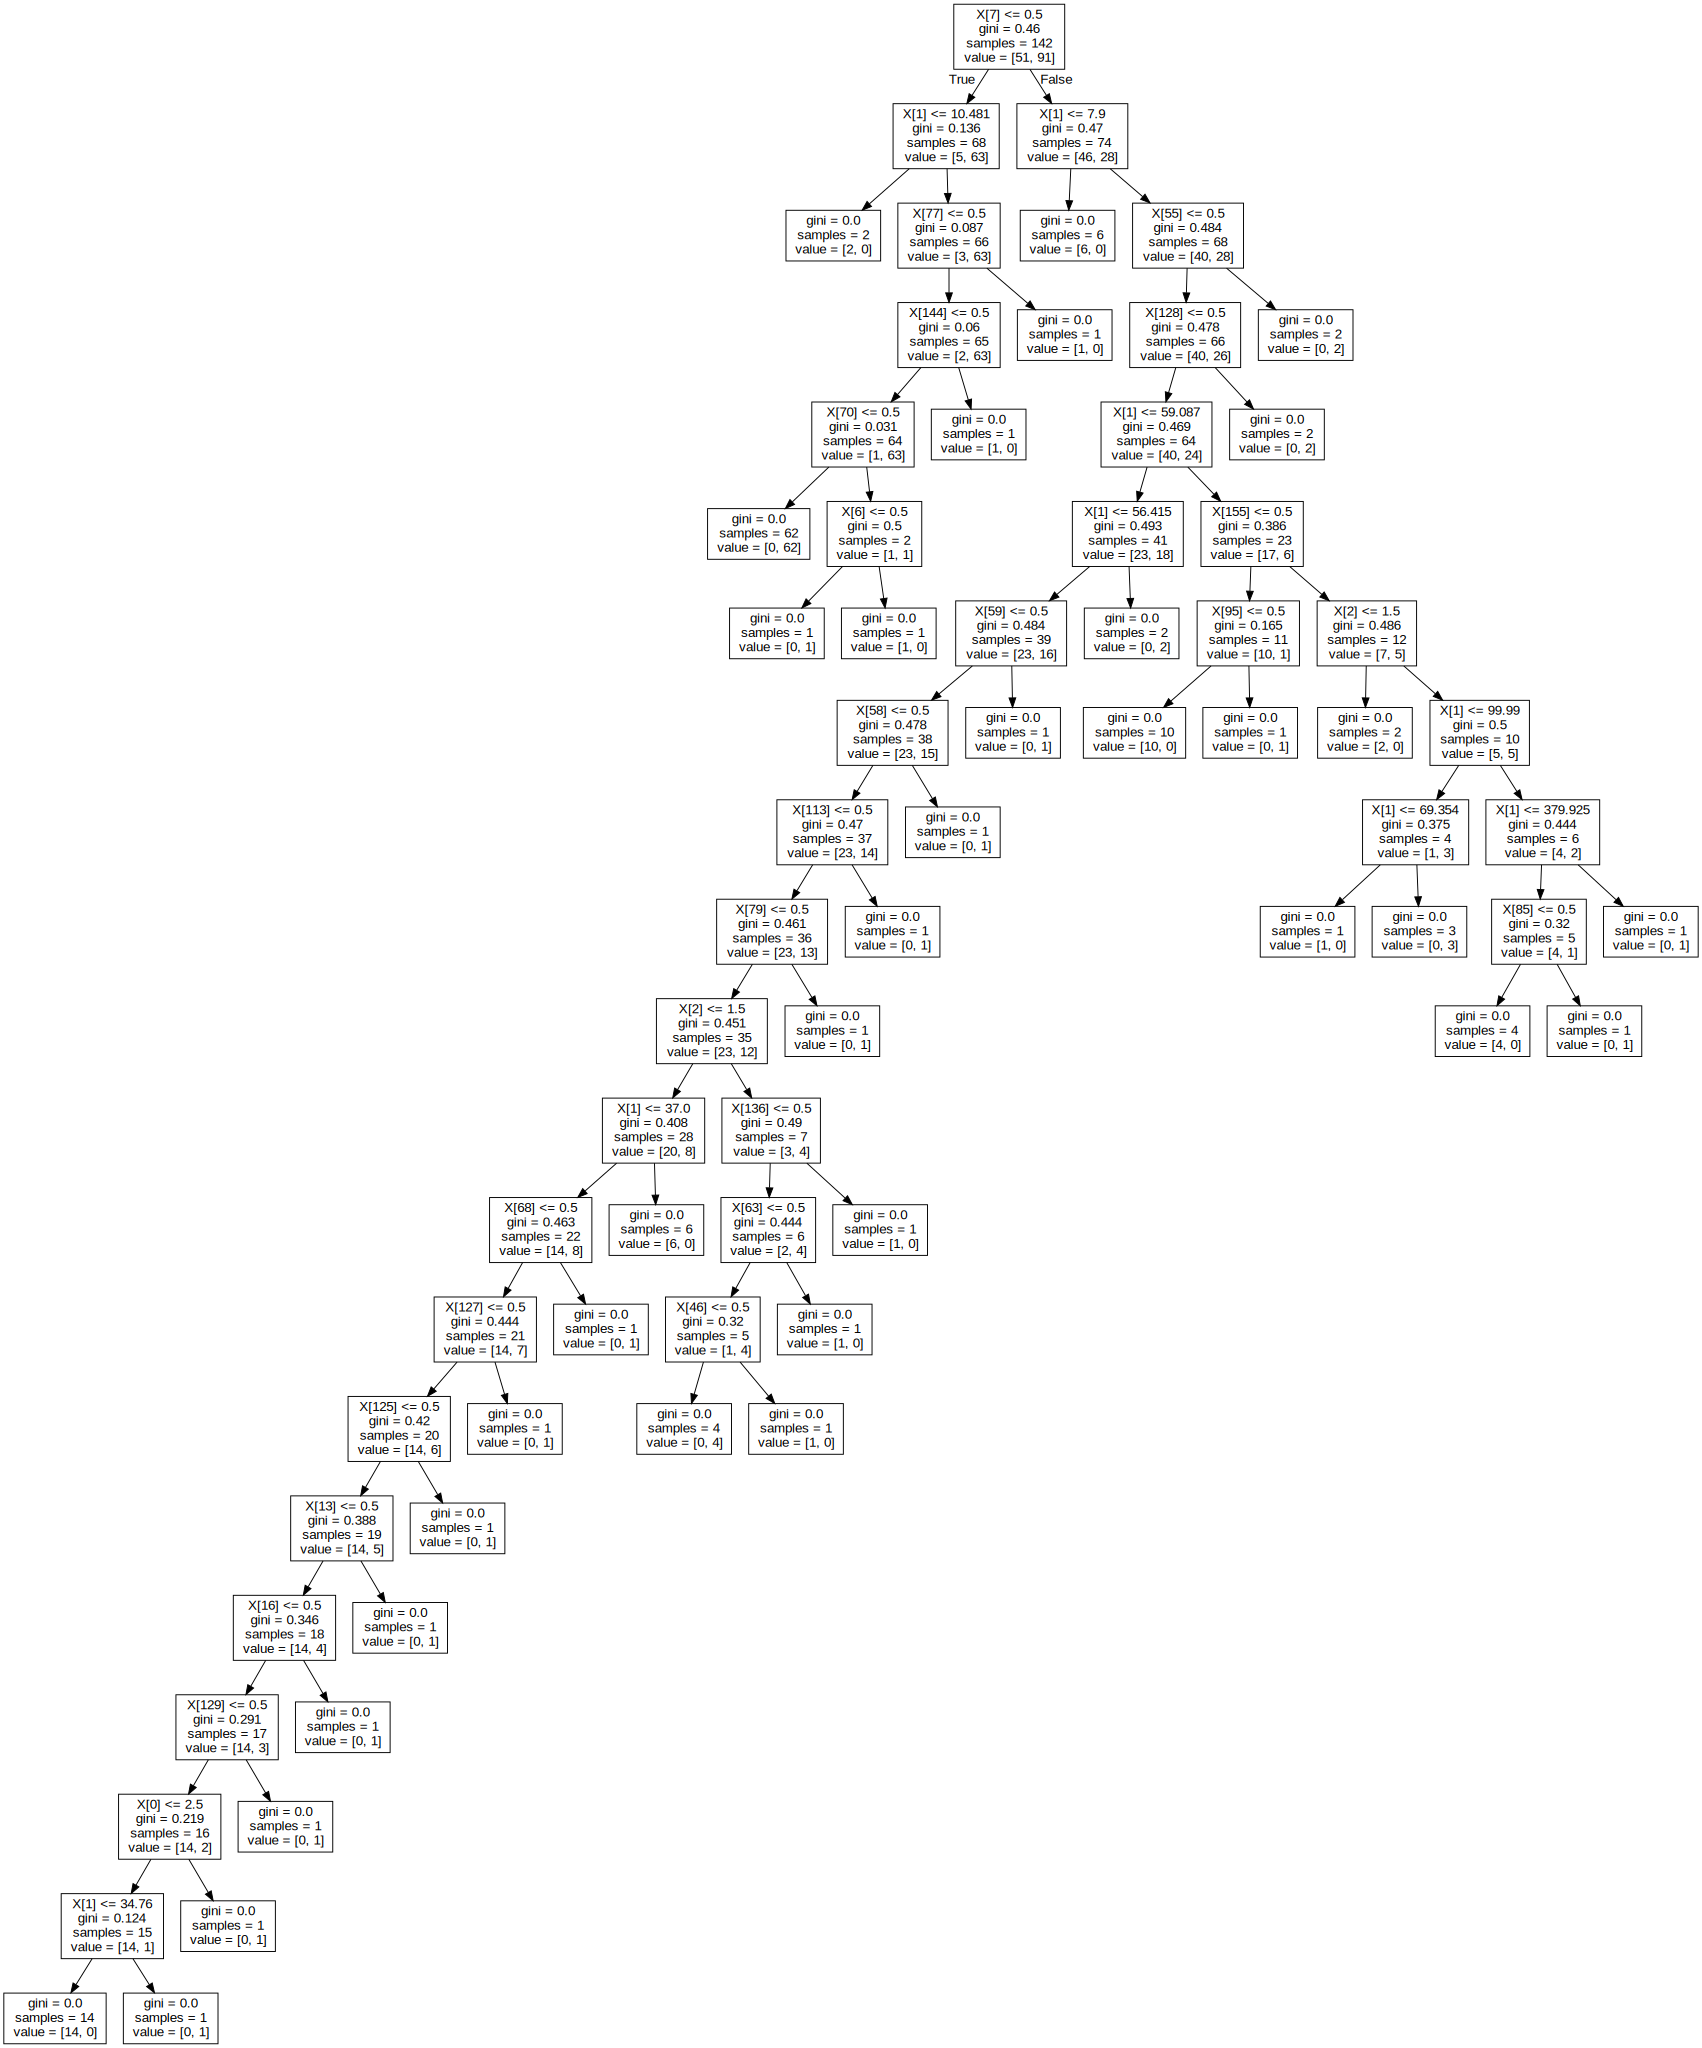

In [51]:
display(graphviz.Source(tree.export_graphviz(dtc)))

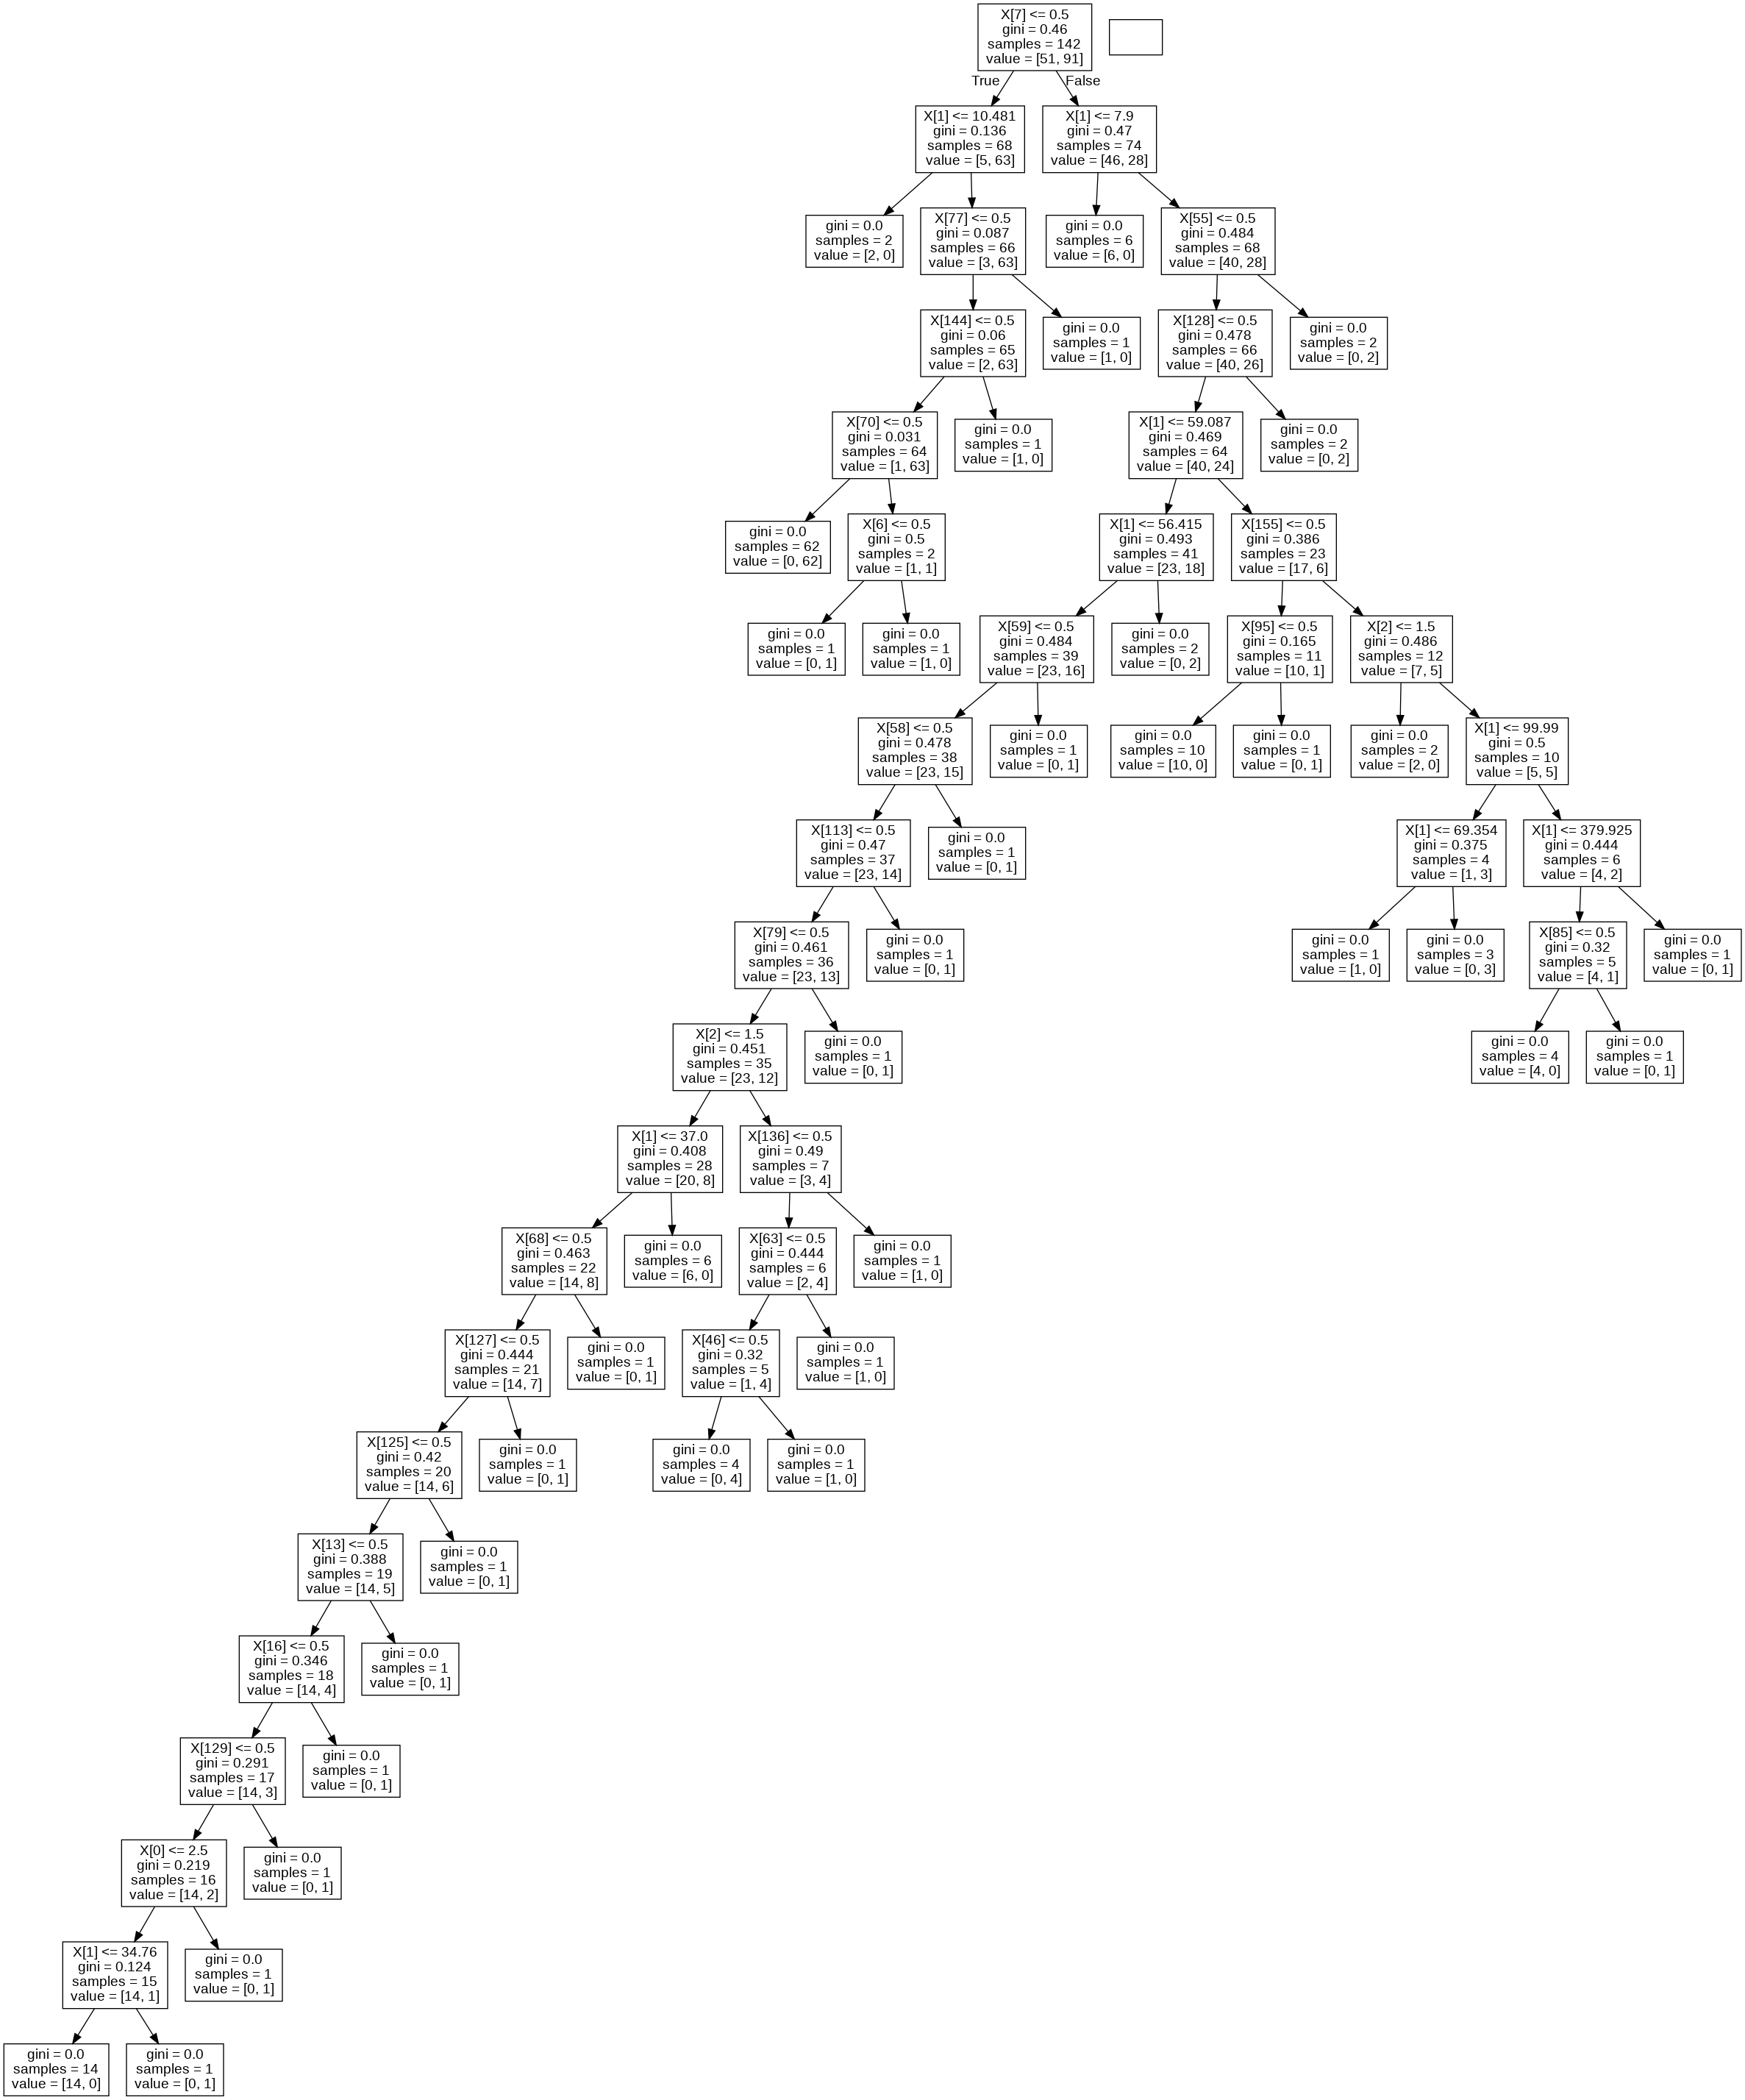

In [52]:
dot_data = tree.export_graphviz(dtc)
graph = pydotplus.graphviz.graph_from_dot_data(dot_data)
Image(graph.create_png())

## <div dir="rtl"> قسمت m</div>

<div dir="rtl">

بله بیش برازش اتفاق افتاده است،

از آنجا که دقت آموزش برابر با 100 درصد است و دقت برای داده های تست برابر با 80 درصد است نتیجه میگیریم که دچار بیش برازش روی داده های آموزش شده و نمتواند در مورد داده های تست به خوبی تصمیم گیری کند.

راه حل تنظیم هایپر پارامترهای درخت تصمیم به صورت مناسب است.

<div>

## <div dir="rtl"> قسمت n</div>

<div dir="rtl">

از ماتریس confusionنتیجه میگیریم که  11 تا از نمونه ها به درستی تشخیص داده شده اند که متعلق به کلاص 0 هستند و 39 تا از داده ها به درستی به کلاس 1 نسبت داده شده اند.

همچنین ۶ تا از داده ها به کلاس 1 تعلق دارند اما مدل به اشتباه آنها را به کلاس 0 نسبت داده و 6 تا از داده ها به کلاس 0 تعلق دارند اما در کلاس 1 قرار گرفته اند.


<div>

In [53]:
metrics.confusion_matrix(y_test, y_test_pred)

array([[11,  6],
       [ 6, 39]])

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


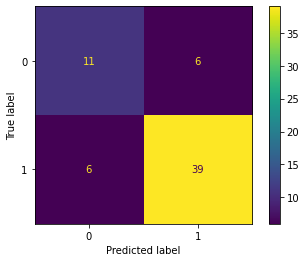

In [54]:
metrics.plot_confusion_matrix(dtc, X_test, y_test) 
plt.show()

## <div dir="rtl"> قسمت o</div>

<div dir="rtl">

یافتن بهترین هایپرپارامترها با استفاده از grid search

<div>

In [32]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    'max_depth': [60, 70, 80, 90, 100, 110],
    'max_features': [1, 2, 3, 4, 5],
    'min_samples_leaf': [1, 2, 3, 4, 5],
    'min_samples_split': [6, 8, 10, 12, 14, 16, 18, 20],
}

model = DecisionTreeClassifier()
grid_search = GridSearchCV(estimator = model, param_grid = param_grid, 
                          cv = 5, n_jobs = -1, verbose = 2)
grid_search.fit(X_train, y_train)
grid_search.best_params_

Fitting 5 folds for each of 1200 candidates, totalling 6000 fits


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


{'max_depth': 90,
 'max_features': 5,
 'min_samples_leaf': 1,
 'min_samples_split': 20}

In [33]:
dtc = DecisionTreeClassifier(random_state=0, max_depth=90, max_features=5, 
                             min_samples_leaf=1, min_samples_split=20)
dtc.fit(X_train, y_train)
y_train_pred = dtc.predict(X_train)
y_test_pred = dtc.predict(X_test)
dt_train_acc = metrics.accuracy_score(y_train, y_train_pred)
dt_test_acc = metrics.accuracy_score(y_test, y_test_pred)
dt_train_acc, dt_test_acc

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


(0.8661971830985915, 0.7580645161290323)

In [34]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    'max_depth': [60, 70,75, 80,85, 90,95, 100,105, 110],
    'max_features': [1, 2, 3, 4, 5,6,7,8],
    'min_samples_leaf': [1, 2, 3, 4, 5,6,7,8],
    'min_samples_split': [6, 8, 10, 12, 14, 16, 18, 20,22,24,26,28],
}

model = DecisionTreeClassifier()
grid_search = GridSearchCV(estimator = model, param_grid = param_grid, 
                          cv = 5, n_jobs = -1, verbose = 2)
grid_search.fit(X_train, y_train)
grid_search.best_params_

Fitting 5 folds for each of 7680 candidates, totalling 38400 fits


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


{'max_depth': 60,
 'max_features': 2,
 'min_samples_leaf': 1,
 'min_samples_split': 20}

In [35]:
dtc = DecisionTreeClassifier(random_state=0, max_depth=60, max_features=2, 
                             min_samples_leaf=1, min_samples_split=20)
dtc.fit(X_train, y_train)
y_train_pred = dtc.predict(X_train)
y_test_pred = dtc.predict(X_test)
dt_train_acc = metrics.accuracy_score(y_train, y_train_pred)
dt_test_acc = metrics.accuracy_score(y_test, y_test_pred)
dt_train_acc, dt_test_acc

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


(0.823943661971831, 0.8548387096774194)

In [36]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    'max_depth': [50,55,60, 70,75, 80],
    'max_features': [1, 2, 3, 4],
    'min_samples_leaf': [1, 2, 3, 4],
    'min_samples_split': [6, 8, 10, 12, 14, 16, 18, 20,22,24,26,28],
}

model = DecisionTreeClassifier()
grid_search = GridSearchCV(estimator = model, param_grid = param_grid, 
                          cv = 5, n_jobs = -1, verbose = 2)
grid_search.fit(X_train, y_train)
grid_search.best_params_

Fitting 5 folds for each of 1152 candidates, totalling 5760 fits


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


{'max_depth': 75,
 'max_features': 3,
 'min_samples_leaf': 1,
 'min_samples_split': 14}

In [37]:
dtc = DecisionTreeClassifier(random_state=0, max_depth=75, max_features=3, 
                             min_samples_leaf=1, min_samples_split=14)
dtc.fit(X_train, y_train)
y_train_pred = dtc.predict(X_train)
y_test_pred = dtc.predict(X_test)
dt_train_acc = metrics.accuracy_score(y_train, y_train_pred)
dt_test_acc = metrics.accuracy_score(y_test, y_test_pred)
dt_train_acc, dt_test_acc

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


(0.9084507042253521, 0.8387096774193549)

## <div dir="rtl">نتیجه گیری قسمت o</div>

<div dir="rtl">


من در چند حالت مختلف با استفاده از grid search بهترین هایپرپارامتر ها را حدس زدم که بهترین نتیجه در شرایط زیر حاصل شد:

{'max_depth': 60,

 'max_features': 2,

 'min_samples_leaf': 1,
 
 'min_samples_split': 20}

 این شرایط باعث دستیابی به 85 درصدصحت در زمان تست شد.

<div>

## <div dir="rtl"> قسمت p</div>

<div dir="rtl">


نمایش بهترین درخت

<div>

In [38]:
dtc = DecisionTreeClassifier(random_state=0, max_depth=60, max_features=2, 
                             min_samples_leaf=1, min_samples_split=20)
dtc.fit(X_train, y_train)
y_train_pred = dtc.predict(X_train)
y_test_pred = dtc.predict(X_test)
dt_train_acc = metrics.accuracy_score(y_train, y_train_pred)
dt_test_acc = metrics.accuracy_score(y_test, y_test_pred)
dt_train_acc, dt_test_acc

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


(0.823943661971831, 0.8548387096774194)

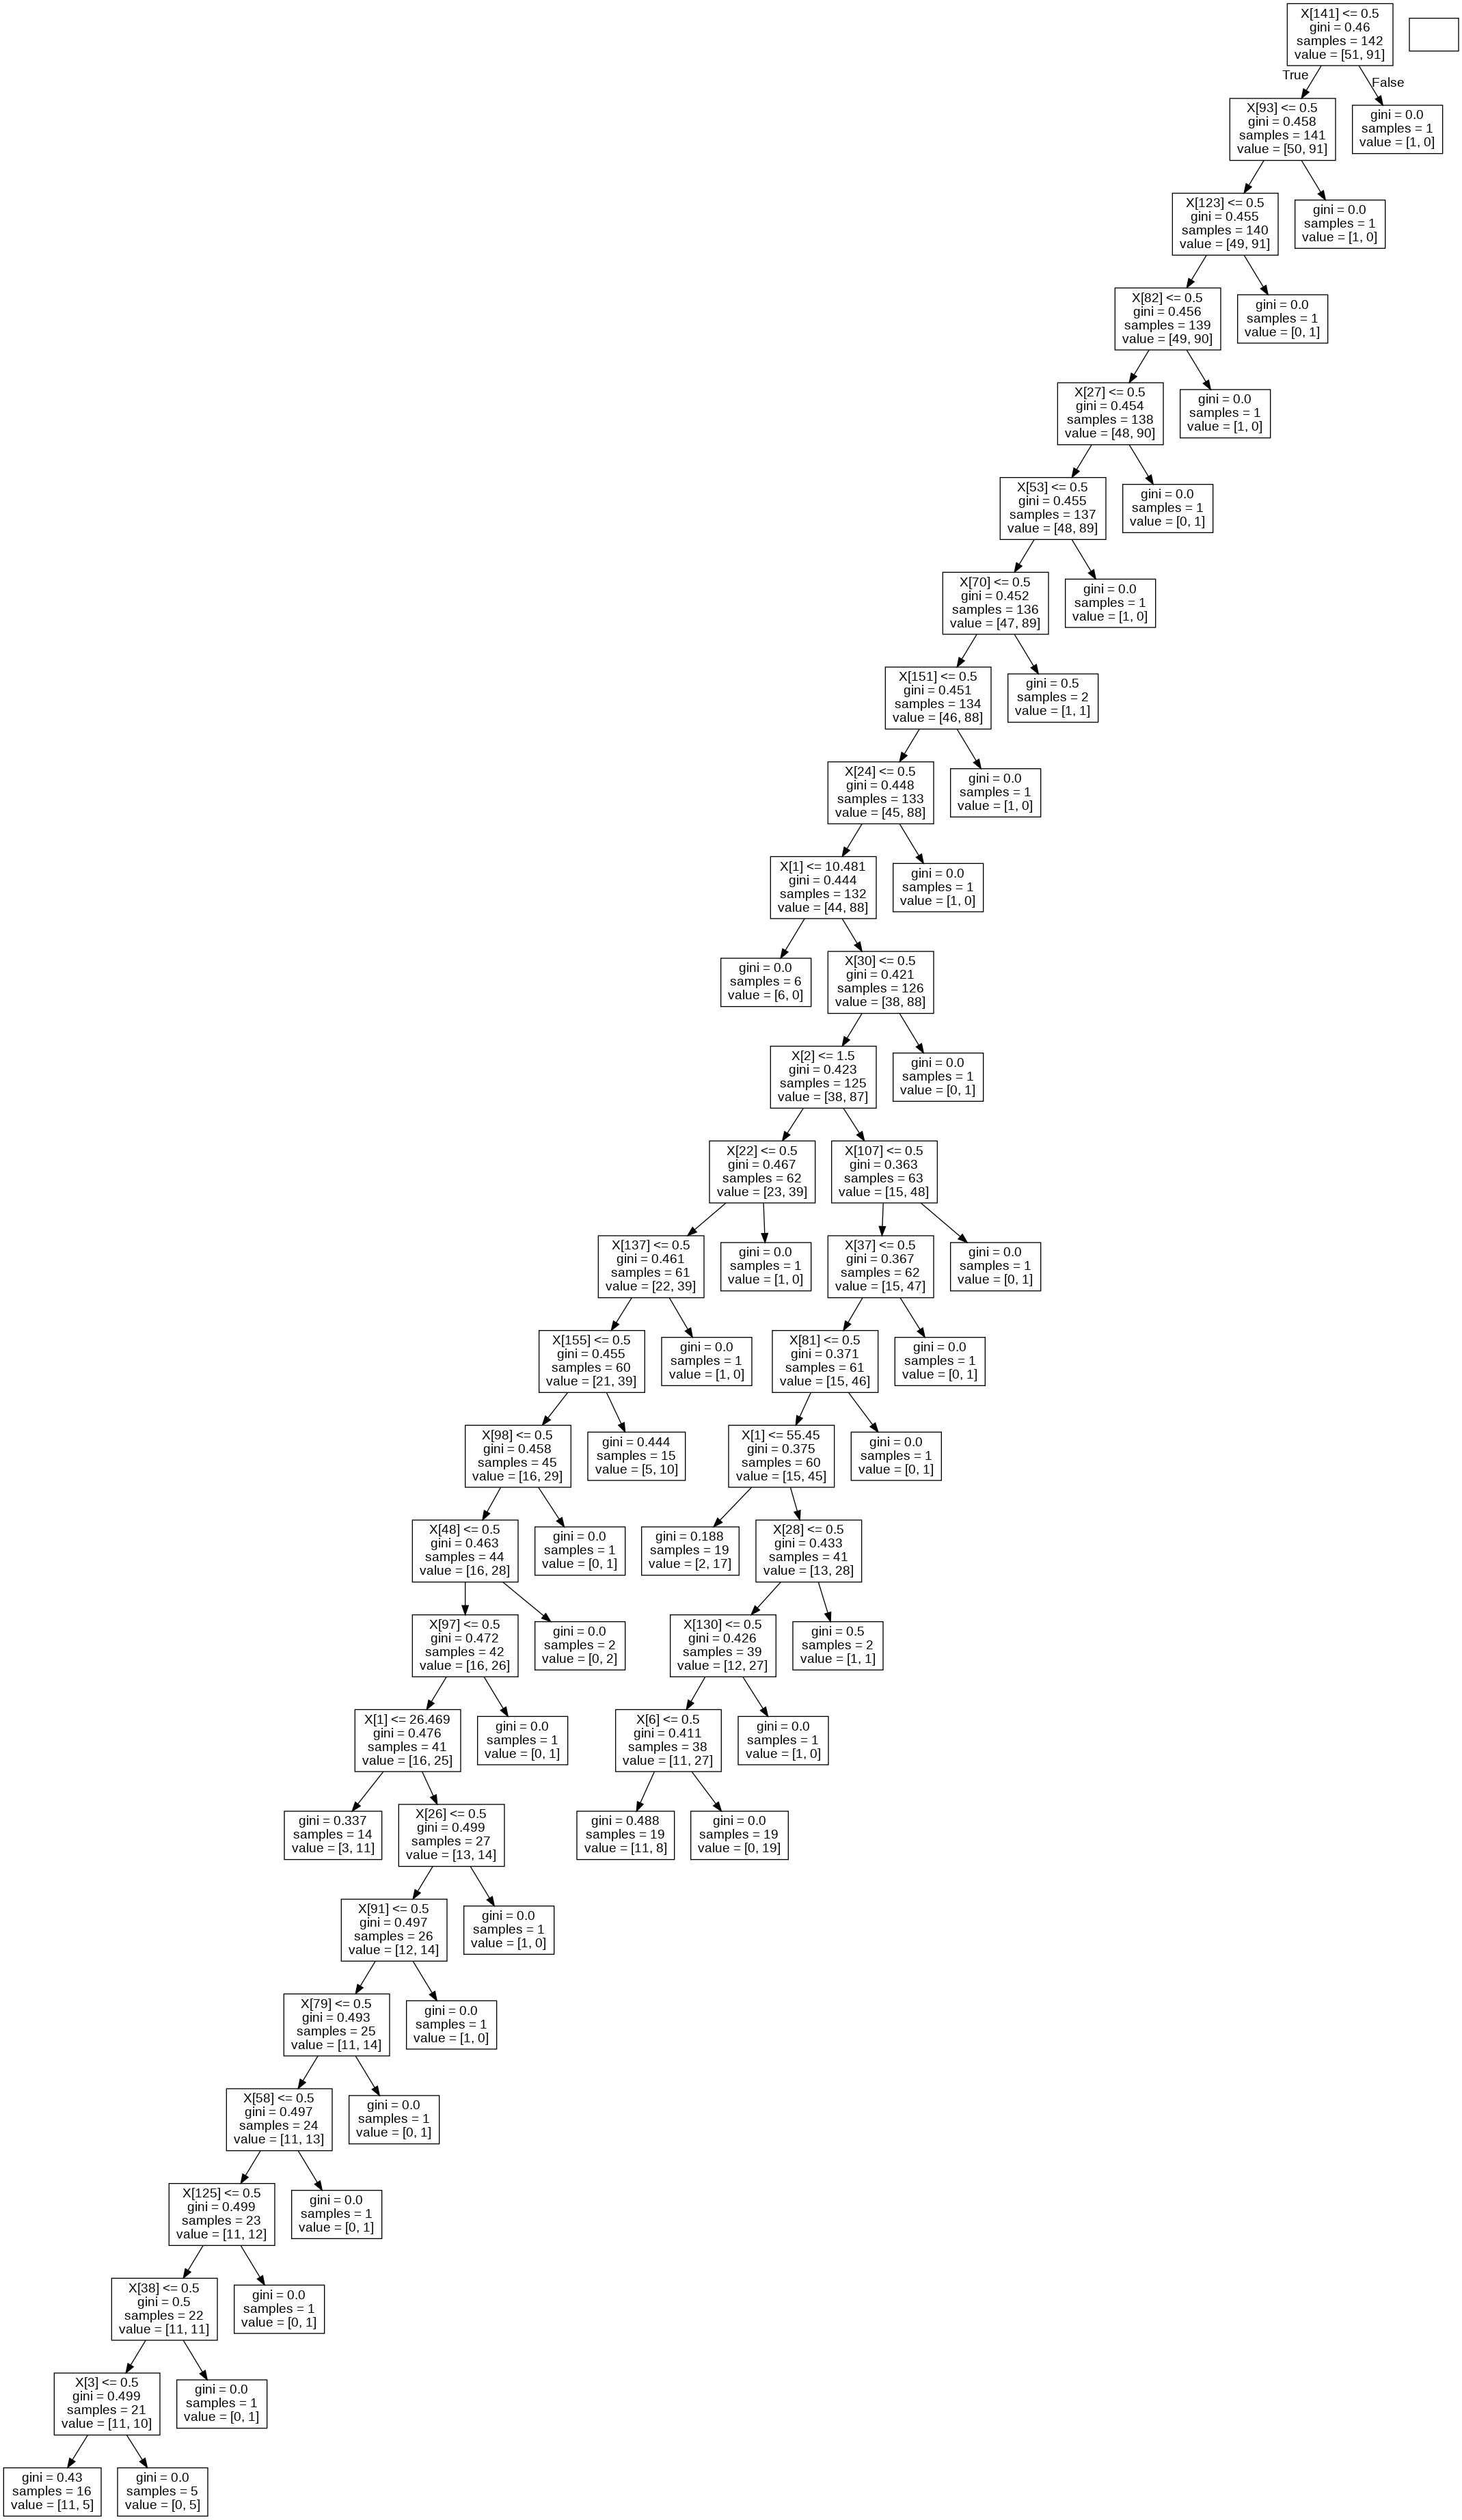

In [39]:
dot_data = tree.export_graphviz(dtc)
graph = pydotplus.graphviz.graph_from_dot_data(dot_data)
Image(graph.create_png())

## <div dir="rtl"> قسمت q</div>


## <div dir="rtl"> قسمت r</div>

<div dir="rtl">

دقت در زمان آموزش مشابه با درخت تصمیم و برابر با 100 درصد است.

دقت در زمان تست حدود دو درصد بهتر از درخت تصمیم و برابر با 82درصد است.

<div>

In [40]:
rfc = RandomForestClassifier(random_state=0)
rfc.fit(X_train, y_train)
y_train_pred = rfc.predict(X_train)
y_test_pred = rfc.predict(X_test)
rf_train_acc = metrics.accuracy_score(y_train, y_train_pred)
rf_test_acc = metrics.accuracy_score(y_test, y_test_pred)
rf_train_acc, rf_test_acc

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


(1.0, 0.8225806451612904)

## <div dir="rtl"> قسمت s</div>


In [42]:
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 200, num = 30)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [1,2,3,4, 5,6,7,8,9, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2,3, 4,5,6]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'criterion': ['gini', 'entropy'],
               'bootstrap': bootstrap}
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestClassifier(random_state=0)
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 5, verbose=2, random_state=0, n_jobs = -1)
# Fit the random search model
rf_random.fit(X_train, y_train)
rf_random.best_params_

Fitting 5 folds for each of 100 candidates, totalling 500 fits


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
55 fits failed out of a total of 500.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
20 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py", line 467, in fit
    for i, t in enumerate(trees)
  File "/usr/local/lib/python3.7/dist-packages/joblib/parallel.py", line 1043, in __call__
    if self.dispatch_one_batch(iterator):
  File "/usr/local/lib/python3.7/dist-packages/joblib/par

{'bootstrap': False,
 'criterion': 'entropy',
 'max_depth': 154,
 'max_features': 'auto',
 'min_samples_leaf': 1,
 'min_samples_split': 9,
 'n_estimators': 1000}

In [43]:
rfc = RandomForestClassifier(random_state=0, bootstrap=False, criterion='entropy', max_depth=154, max_features='auto', min_samples_leaf=1, min_samples_split=9, n_estimators=1000)
rfc.fit(X_train, y_train)
y_train_pred = rfc.predict(X_train)
y_test_pred = rfc.predict(X_test)
rf_train_acc = metrics.accuracy_score(y_train, y_train_pred)
rf_test_acc = metrics.accuracy_score(y_test, y_test_pred)
rf_train_acc, rf_test_acc

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


(1.0, 0.8387096774193549)

In [44]:
from sklearn.model_selection import RandomizedSearchCV
n_estimators = [int(x) for x in np.linspace(start = 1000, stop = 2000, num = 20)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(100, 250, num = 30)]
max_depth.append(None)
min_samples_split = [7,8,9, 10,11,12,13]
min_samples_leaf = [1, 2,3, 4,5,6]
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'criterion': ['gini', 'entropy'],
               'bootstrap': bootstrap}

rf = RandomForestClassifier(random_state=0)
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 5, verbose=2, random_state=0, n_jobs = -1)
rf_random.fit(X_train, y_train)
rf_random.best_params_

Fitting 5 folds for each of 100 candidates, totalling 500 fits


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


{'bootstrap': False,
 'criterion': 'entropy',
 'max_depth': 141,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 10,
 'n_estimators': 1210}

In [45]:
rfc = RandomForestClassifier(random_state=0, bootstrap=False, criterion='entropy', max_depth=141, max_features='sqrt', min_samples_leaf=1, min_samples_split=10, n_estimators=1210)
rfc.fit(X_train, y_train)
y_train_pred = rfc.predict(X_train)
y_test_pred = rfc.predict(X_test)
rf_train_acc = metrics.accuracy_score(y_train, y_train_pred)
rf_test_acc = metrics.accuracy_score(y_test, y_test_pred)
rf_train_acc, rf_test_acc

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


(1.0, 0.8387096774193549)

## <div dir="rtl"> نتیجه گیری قسمت s</div>

<div dir="rtl">

من برای حالات مختلف عملکرد مدل را بررسی کردم و در حالتهای مشابه حداکثر دقت 83.8 درصد در داده های تست را مشاهده کردم.

دو حالت نامبرده:

'bootstrap': False,

 'criterion': 'entropy',

 'max_depth': 154,

 'max_features': 'auto',

 'min_samples_leaf': 1,

 'min_samples_split': 9,

 'n_estimators': 1000

 -------------------------

 'bootstrap': False,

 'criterion': 'entropy',

 'max_depth': 141,

 'max_features': 'sqrt',

 'min_samples_leaf': 1,

 'min_samples_split': 10,
 
 'n_estimators': 1210

<div>

## <div dir="rtl"> قسمت t</div>

<div dir="rtl">

در همه حالات الگوریتم جستجوی تصادفی معیار entropy را پیشنهاد میکرد.

<div>